In [35]:
# Importing Libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.base import clone

In [36]:
#Load Data and store it into pandas DataFrame objects
iris = load_iris()
X = pd.DataFrame(iris.data[:, :], columns=iris.feature_names[:])
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [37]:
# preprocessing 1 - Feature scaling
# rescale a range between an arbitrary set of values [a, b] where a=-1, b=1
scaler = MinMaxScaler(feature_range=(-1, 1)) # build the scaler model
X_rescaled_features = scaler.fit_transform(X) 
X_rescaled_features = pd.DataFrame(X_rescaled_features[:, :], columns=iris.feature_names[:])
print(X_rescaled_features)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.555556          0.250000          -0.864407         -0.916667
1            -0.666667         -0.166667          -0.864407         -0.916667
2            -0.777778          0.000000          -0.898305         -0.916667
3            -0.833333         -0.083333          -0.830508         -0.916667
4            -0.611111          0.333333          -0.864407         -0.916667
..                 ...               ...                ...               ...
145           0.333333         -0.166667           0.423729          0.833333
146           0.111111         -0.583333           0.355932          0.500000
147           0.222222         -0.166667           0.423729          0.583333
148           0.055556          0.166667           0.491525          0.833333
149          -0.111111         -0.166667           0.389831          0.416667

[150 rows x 4 columns]


In [38]:
Y = pd.DataFrame(iris.target, columns=["Species"])
# Species are setosa,versicolor,virginica
print(Y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [39]:
# preprocessing 1 - Feature scaling
Y_rescaled_features = scaler.fit_transform(Y)
Y_rescaled_features = pd.DataFrame(Y_rescaled_features, columns=["Species"])
print(Y_rescaled_features)

     Species
0       -1.0
1       -1.0
2       -1.0
3       -1.0
4       -1.0
..       ...
145      1.0
146      1.0
147      1.0
148      1.0
149      1.0

[150 rows x 1 columns]


In [40]:
# Train the model on the data
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled_features, Y_rescaled_features, test_size=0.25)

In [41]:
X_train.shape 

(112, 4)

In [42]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,-0.388889,0.416667,-0.830508,-9.166667e-01
12,-0.722222,-0.166667,-0.864407,-1.000000e+00
43,-0.611111,0.250000,-0.796610,-5.833333e-01
146,0.111111,-0.583333,0.355932,5.000000e-01
96,-0.222222,-0.250000,0.084746,2.220446e-16
...,...,...,...,...
64,-0.277778,-0.250000,-0.118644,2.220446e-16
82,-0.166667,-0.416667,-0.016949,-8.333333e-02
36,-0.333333,0.250000,-0.898305,-9.166667e-01
72,0.111111,-0.583333,0.322034,1.666667e-01


In [43]:
X_test.shape

(38, 4)

In [44]:
Y_train.shape 

(112, 1)

In [45]:
Y_test.shape 

(38, 1)

In [46]:
Y_test[0:10]

,Species
124,1.0
27,-1.0
56,0.0
4,-1.0
71,0.0
53,0.0
52,0.0
93,0.0
83,0.0
117,1.0


In [47]:
# Now let's fit a DecisionTreeClassifier instance
Dtree = DecisionTreeClassifier(max_depth=5)
Dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [48]:
Dtree.score(X_test, Y_test)

0.9736842105263158

In [49]:
# Making a Prediction on a new sample 
sample_data1 = int(Dtree.predict([[5, 5, 1, 3]]))
print(iris.target_names[sample_data1])

versicolor


In [50]:
sample_data1 = int(Dtree.predict([[5, 5, 2.6, 1.5]]))
print(iris.target_names[sample_data1])

versicolor


In [51]:
sample_data1 = int(Dtree.predict([[5, 5, 15, 5]]))
print(iris.target_names[sample_data1])

versicolor


In [52]:
sample_data1 = int(Dtree.predict([[1.3, 7, 2.5, 4]]))
print(iris.target_names[sample_data1])

versicolor


In [53]:
# tree.plot_tree(Dtree)
# plt.show()

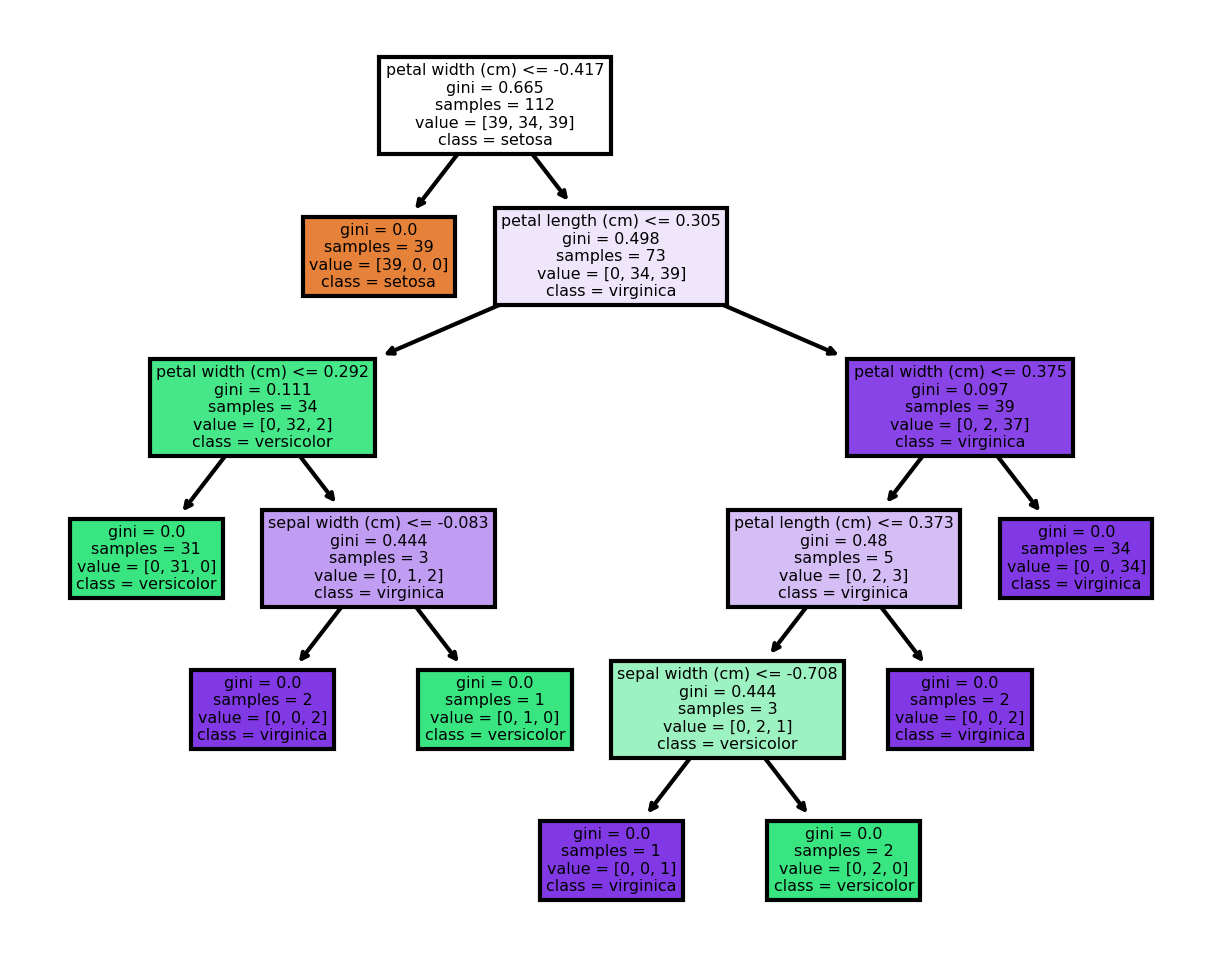

In [54]:
# Visualizing the build Decision tree
#     gini is a measure that is used to find a node to split on it
#     samples refer to the number of samples that are entering this node
#     value is a split of the data instances according to their class 
#     value = [instances_num_of_setosa, instances_num_of_versicolor, instances_num_of_virginica]
#     class is what the decision tree would predict

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)

tree.plot_tree(Dtree,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [55]:
print(Dtree.tree_.value)

[[[39. 34. 39.]]

 [[39.  0.  0.]]

 [[ 0. 34. 39.]]

 [[ 0. 32.  2.]]

 [[ 0. 31.  0.]]

 [[ 0.  1.  2.]]

 [[ 0.  0.  2.]]

 [[ 0.  1.  0.]]

 [[ 0.  2. 37.]]

 [[ 0.  2.  3.]]

 [[ 0.  2.  1.]]

 [[ 0.  0.  1.]]

 [[ 0.  2.  0.]]

 [[ 0.  0.  2.]]

 [[ 0.  0. 34.]]]


In [56]:
def find_leaves(X, clf):
    """A function to find leaves of a DecisionTreeClassifier
    clf must be a fitted DecisionTreeClassifier
    """
    return set(clf.apply(X)) # returns set of leaves indexes 
leaves = find_leaves(X_train, Dtree)

In [57]:
leaves_value_list = []
for l in leaves:
    leaves_value_list.append(Dtree.tree_.value[l])

leaves_value_list = np.array(leaves_value_list)
print(leaves_value_list)

[[[39.  0.  0.]]

 [[ 0. 31.  0.]]

 [[ 0.  0.  2.]]

 [[ 0.  1.  0.]]

 [[ 0.  0.  1.]]

 [[ 0.  2.  0.]]

 [[ 0.  0.  2.]]

 [[ 0.  0. 34.]]]


In [58]:
# preprocessing 2 - 1 hot encoding
ohe = []
for val in leaves_value_list:    
    one_hot_encoding = np.zeros_like(val)
    one_hot_encoding[np.arange(len(val)), val.argmax(1)] = 1
    ohe.append(one_hot_encoding)
    
ohe = np.array(ohe) 
print(ohe)

[[[1. 0. 0.]]

 [[0. 1. 0.]]

 [[0. 0. 1.]]

 [[0. 1. 0.]]

 [[0. 0. 1.]]

 [[0. 1. 0.]]

 [[0. 0. 1.]]

 [[0. 0. 1.]]]


In [108]:
class T:
    tree = clone(Dtree)
    leaf_value = ohe

mytree = T()
# print(mytree.leaf_value)
mytree.tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=5)

In [110]:
# numpy.linspace(start, stop, num_of_samples); Returns num evenly spaced samples,
# calculated over the interval [start, stop]
X = np.linspace(-2, 2, num=401)

# concatenate((a1, a2, ...), axis=0); combines NumPy arrays together
# axis=None => arrays are flattened before use.
y1 = np.zeros(200)
y2 = np.ones(1)
y3 = np.ones(200)
Y = np.concatenate((y1, y2, y3), axis=None)

In [111]:
# weights functions
w1 = np.concatenate(((2 / 7) * (np.ones(150)), np.zeros(101)), axis=None)

# 7/2 is godel of range [0.25,2] + [-2,-0.25]
# the first 150 values ([-2,0.25]) have a weight of 2/7
# the next 101 values ([-0.25,0.25]) have a weight of 0
# the last 150 values ([0.25,2]) have a weight of 2/7
# weight = np.concatenate((partW1, (2/7)*np.ones(75)), axis=None)
w2 = (2 / 7) * np.ones(150)
weight = np.concatenate((w1, w2), axis=None)

In [112]:
# we use the above function in polyfit to help calculate the polynome
# polyfit(x, y, deg, w); least square polynomial fit
pf = np.polyfit(X, Y, 32, w=weight)
# print(pf)
# poly1d(c_or_r); The polynomial’s coefficients in decreasing powers
p = np.poly1d(pf)
print(p)

            32             31             30            29
-3.924e-10 x  - 5.221e-05 x  + 1.326e-08 x  + 0.001771 x 
              28           27             26          25             24
 - 2.049e-07 x  - 0.02743 x  + 1.917e-06 x  + 0.2572 x  - 1.213e-05 x 
          23             22         21             20         19
 - 1.631 x  + 5.491e-05 x  + 7.391 x  - 0.0001835 x  - 24.71 x 
              18         17             16         15            14
 + 0.0004605 x  + 62.01 x  - 0.0008737 x  - 117.6 x  + 0.001253 x 
          13            12         11           10         9
 + 168.8 x  - 0.001347 x  - 181.9 x  + 0.00107 x  + 145.5 x
              8         7             6        5             4
 - 0.0006092 x - 84.61 x + 0.0002367 x + 34.8 x - 5.735e-05 x
          3             2
 - 9.861 x + 7.306e-06 x + 2.186 x + 0.5


In [113]:
myline = np.linspace(-2, 2, 401)
# plt.scatter(X, Y) 

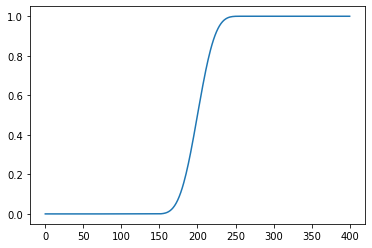

In [114]:
plt.plot(p(myline)) 

In [115]:
mytree.tree.tree_.children_left

array([ 1, -1,  3,  4, -1,  6, -1, -1,  9, 10, -1, 12, -1, -1, -1],
      dtype=int64)

In [116]:
mytree.tree.tree_.children_right

array([ 2, -1,  8,  5, -1,  7, -1, -1, 14, 11, -1, 13, -1, -1, -1],
      dtype=int64)

In [117]:
mytree.tree.tree_.capacity

15

In [118]:
mytree.tree.tree_.node_count

15

In [119]:
list(mytree.tree.tree_.threshold)

[-0.4166666567325592,
 -2.0,
 0.3050847500562668,
 0.2916666716337204,
 -2.0,
 -0.0833333358168602,
 -2.0,
 -2.0,
 0.375,
 0.05555555596947648,
 -2.0,
 0.37288135290145874,
 -2.0,
 -2.0,
 -2.0]

In [120]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,-0.388889,0.416667,-0.830508,-9.166667e-01
12,-0.722222,-0.166667,-0.864407,-1.000000e+00
43,-0.611111,0.250000,-0.796610,-5.833333e-01
146,0.111111,-0.583333,0.355932,5.000000e-01
96,-0.222222,-0.250000,0.084746,2.220446e-16
...,...,...,...,...
64,-0.277778,-0.250000,-0.118644,2.220446e-16
82,-0.166667,-0.416667,-0.016949,-8.333333e-02
36,-0.333333,0.250000,-0.898305,-9.166667e-01
72,0.111111,-0.583333,0.322034,1.666667e-01


In [121]:
mytree.tree.tree_.feature

array([ 3, -2,  2,  3, -2,  1, -2, -2,  3,  0, -2,  2, -2, -2, -2],
      dtype=int64)

In [122]:
leaves

{1, 4, 6, 7, 11, 12, 13, 14}

In [123]:
leaves_value_list

array([[[39.,  0.,  0.]],

       [[ 0., 31.,  0.]],

       [[ 0.,  0.,  2.]],

       [[ 0.,  1.,  0.]],

       [[ 0.,  0.,  1.]],

       [[ 0.,  2.,  0.]],

       [[ 0.,  0.,  2.]],

       [[ 0.,  0., 34.]]])

In [124]:
mytree.leaf_value

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[0., 0., 1.]]])

In [177]:
n_nodes = mytree.tree.tree_.node_count
flag=[0]*n_nodes
flag = np.array(flag)
for i in range(n_nodes):
    if i in leaves:
        flag[i]=True
    else:
        flag[i]=False

In [183]:

indexes = [0]*n_nodes
indexes = np.array(indexes)
leftChild = mytree.tree.tree_.children_left
rightChild = mytree.tree.tree_.children_right
def preorder(mytree,i):
    if flag[i]==1: return None
    indexes[i]=i
    preorder(mytree.tree.tree_.children_left[i],i+1)
    preorder(mytree.tree.tree_.children_right[i],i+1)


In [144]:
preorder(mytree,0)